<a href="https://colab.research.google.com/github/Nataliia-Shap/SofPR/blob/main/%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D1%80_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Приклад 2

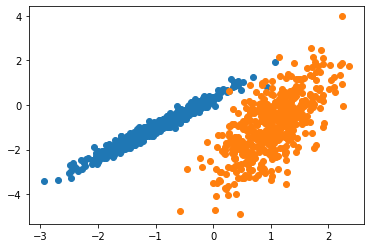

In [1]:
# synthetic classification dataset
from numpy import where, unique
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import (homogeneity_score, silhouette_score, davies_bouldin_score,
                                     adjusted_rand_score, calinski_harabasz_score, adjusted_mutual_info_score,
                                     v_measure_score, completeness_score, silhouette_samples)
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

### kmeans

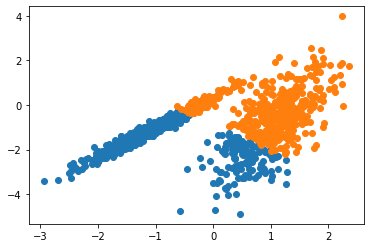

0.761
The average silhouette_score is : 0.4226907577348386
ARand: 0.2717580058724039
V: 0.20791601716633334
MI: 0.20734252307937323


In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=4,random_state=0).fit(X)
#Використаємо навчений класифікатор
km_predict=kmeans.predict(X)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(km_predict == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()
a_km = accuracy_score(y,km_predict)
print(a_km)
silhouette_avg = silhouette_score(X, km_predict)
print("The average silhouette_score is :", silhouette_avg)
ad=adjusted_rand_score(y,km_predict)
print("ARand:", ad)
v_measure_score
v=v_measure_score(y,km_predict)
print("V:", v)
a=adjusted_mutual_info_score(y,km_predict)
print("MI:", a)

### kmedoid

     |████████████████████████████████| 1.7 MB 14.7 MB/s 
     |████████████████████████████████| 22.3 MB 92.2 MB/s 
     |████████████████████████████████| 154 kB 68.7 MB/s 
  Created wheel for API: filename=api-0.0.7-py3-none-any.whl size=2325 sha256=9ae4ddf47f6157ce1927dcd4c4357ac15566163983a05e8cdc143bea33eae993
  Stored in directory: /root/.cache/pip/wheels/f4/38/af/83aa61fa8d7188f23479b75bbab8c2881f9887553e5d9fbb57
Successfully built API
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


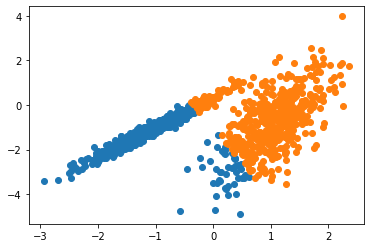

0.876


In [ ]:
!pip install scikit-learn-extra API
from sklearn_extra.cluster import KMedoids
kmedoid = KMedoids(n_clusters=2, random_state=0).fit(X)
#Використаємо навчений класифікатор
km_predict=kmedoid.predict(X)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(km_predict == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()
a_km = accuracy_score(y, km_predict)
print(a_km)

### Ієрархічна кластеризація

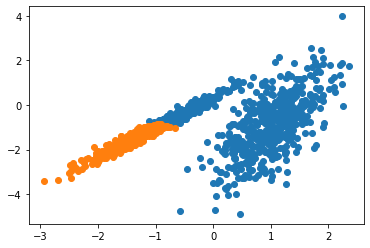

0.202


In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac_predict= AgglomerativeClustering(n_clusters=2).fit_predict(X)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(ac_predict == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()
a_ac = accuracy_score(y,ac_predict)
print(a_ac)

### Affinity Propagation

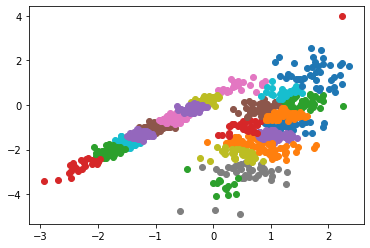

[ 76  66   2 ... 101  17  13]
0.9693934335002783


In [ ]:
from sklearn.cluster import AffinityPropagation
from numpy import unique
from numpy import where
model = AffinityPropagation(damping=0.9)
model.fit(X)
Label = model.predict(X)
clusters = unique(Label)
for cluster in clusters:
	row_ix = where(Label == cluster)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()
###
# необхідні бібліотеки
from sklearn.datasets import load_digits
import numpy as np
# завантажимо дані та розіб'ємо на навчальну та перевірочну
digits = load_digits()
data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size
af = AffinityPropagation().fit(data)
af_predict = af.labels_
print(af_predict)
reference_labels = {}
for i in range(len(np.unique(af_predict))):
  index = np.where(af_predict == i,1,0)
  num = np.bincount(labels[index==1]).argmax()
  reference_labels[i] = num
  number_labels = np.random.rand(len(af_predict))
for i in range(len(af_predict)):
  number_labels[i] = reference_labels[af_predict[i]]
a_ac = accuracy_score(labels, number_labels)
print(a_ac)

### DBSCAN

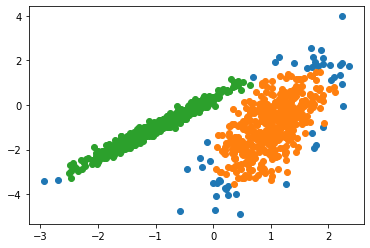

0.003


In [7]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.30, min_samples=9)
#використаємо модель
Label = model.fit_predict(X)
clusters = unique(Label)
for cluster in clusters:
	row_ix = where(Label == cluster)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()
a_ac = accuracy_score(y, Label)
print(a_ac)

### BIRCH

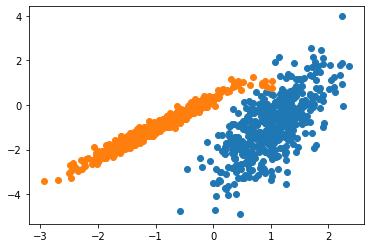

0.008
The average silhouette_score is : 0.4243692758642153
ARand: 0.9682241987277034
V: 0.9363997537528679
MI: 0.9682241987277034


In [8]:
from sklearn.cluster import Birch
model = Birch(threshold=0.01, n_clusters=2)
model.fit(X)
Label = model.predict(X)
clusters = unique(Label)
for cluster in clusters:
	row_ix = where(Label == cluster)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()
a_ac = accuracy_score(y, Label)
print(a_ac)
silhouette_avg = silhouette_score(X, Label)
print("The average silhouette_score is :", silhouette_avg)
ad=adjusted_rand_score(y,Label)
print("ARand:", ad)
v_measure_score
v=v_measure_score(y,Label)
print("V:", v)
v=adjusted_mutual_info_score(y,Label)
print("MI:", ad)

### EM

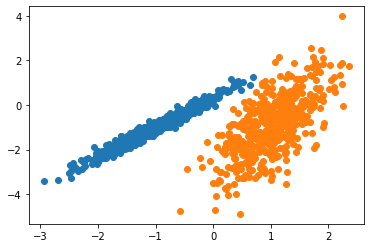

0.996


In [3]:
from numpy import hstack
from numpy.random import normal
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=2).fit(X)
Label=model.predict(X)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(Label == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()
a_ac = accuracy_score(y, Label)
print(a_ac)

### MeanShift

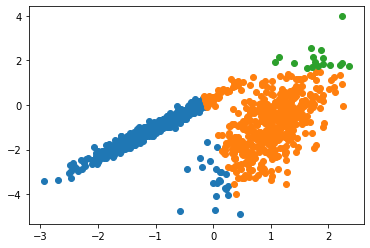

0.915


In [ ]:
# mean shift clustering
from numpy import unique
from numpy import where
from sklearn.cluster import MeanShift
model = MeanShift()
# fit model and predict clusters
Label = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(Label)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(Label == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()
a_ac = accuracy_score(y, Label)
print(a_ac)